In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


# Import the dataFrame

In [2]:
df = pd.read_csv('data/weblogs_train.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


# Analyze the data
## Frame the problem
- We want to predict wether the data is most likely to be a robot or a human
- We want to ban as much robots from the site without banning humans
- We want to ban as many robots as possible
- This is a binary classification problem

In [3]:
# Drop the columns that are not required
df.drop('ID', axis=1, inplace=True)
df.dropna(inplace=True)
# Use hot deck imputation to fill the NaN values

# Drop the rows where ROBOT column is not 0 or 1
df = df[(df['ROBOT'] == 0) | (df['ROBOT'] == 1)]

df.fillna(0, inplace=True)
df.head()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,1.0,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,1.0,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,1.0,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52816 entries, 0 to 67147
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMBER_OF_REQUESTS  52816 non-null  int64  
 1   TOTAL_DURATION      52816 non-null  int64  
 2   AVERAGE_TIME        52816 non-null  float64
 3   STANDARD_DEVIATION  52816 non-null  float64
 4   REPEATED_REQUESTS   52816 non-null  float64
 5   HTTP_RESPONSE_2XX   52816 non-null  float64
 6   HTTP_RESPONSE_3XX   52816 non-null  float64
 7   HTTP_RESPONSE_4XX   52816 non-null  float64
 8   HTTP_RESPONSE_5XX   52816 non-null  float64
 9   GET_METHOD          52816 non-null  float64
 10  POST_METHOD         52816 non-null  float64
 11  HEAD_METHOD         52816 non-null  float64
 12  OTHER_METHOD        52816 non-null  float64
 13  NIGHT               52816 non-null  float64
 14  UNASSIGNED          52816 non-null  float64
 15  IMAGES              52816 non-null  float64
 16  TOTA

In [5]:
df["ROBOT"].value_counts()
df["ROBOT"].info()

<class 'pandas.core.series.Series'>
Int64Index: 52816 entries, 0 to 67147
Series name: ROBOT
Non-Null Count  Dtype
--------------  -----
52816 non-null  int64
dtypes: int64(1)
memory usage: 825.2 KB


<Axes: xlabel='ROBOT', ylabel='count'>

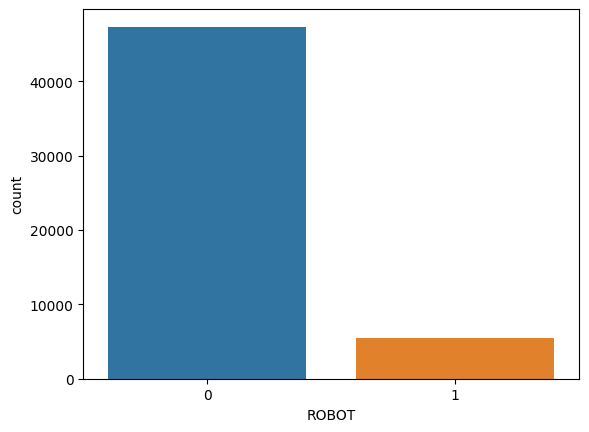

In [6]:
# Visualize the data based on the ROBOT column
sns.countplot(x='ROBOT', data=df)

<Axes: >

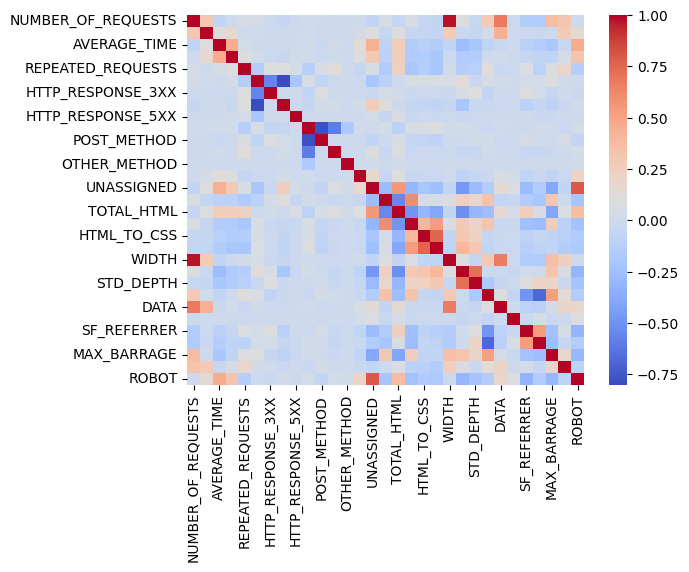

In [7]:
corr = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler

y  = df['ROBOT'].to_numpy()

scaler = StandardScaler()
scaler.fit(df.drop('ROBOT', axis=1))
X = scaler.transform(df.drop('ROBOT', axis=1))
X.shape, y.shape

((52816, 30), (52816,))

# Split the data into a training set and a test set

In [9]:
# Double the size of the minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101, sampling_strategy=.5, k_neighbors=8)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63926, 30), (7103, 30), (63926,), (7103,))

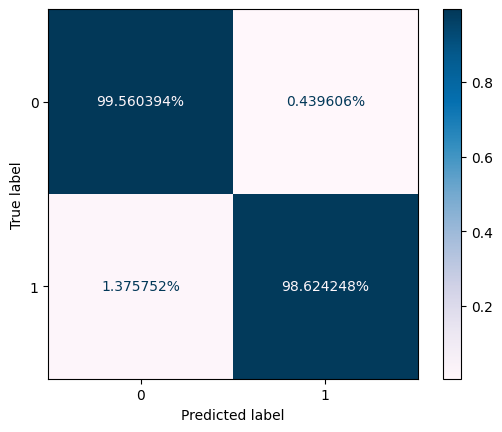

In [10]:
# Use randomtree classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Predict the values
predictions = rfc.predict(X_test)
# Create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Plot the confusion matrix with percentage values
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        normalize="true", values_format=".6%", cmap="PuBu")


# Paramter tuning
## Grid search

In [11]:

# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4777
           1       0.99      0.99      0.99      2326

    accuracy                           0.99      7103
   macro avg       0.99      0.99      0.99      7103
weighted avg       0.99      0.99      0.99      7103



In [12]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200, 500, 1000],
                'max_depth': [None, 5, 10, 20, 30, 40, 50],
                'min_samples_split': [2, 4, 6, 8, 10],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

# Create the grid search object 
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3, cv=3, n_jobs=-1)

# Fit the model
grid.fit(X_train, y_train)

# Print the best parameters
grid.best_params_

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5419
           1       0.95      0.98      0.96      2645

    accuracy                           0.97      8064
   macro avg       0.97      0.97      0.97      8064
weighted avg       0.97      0.97      0.97      8064



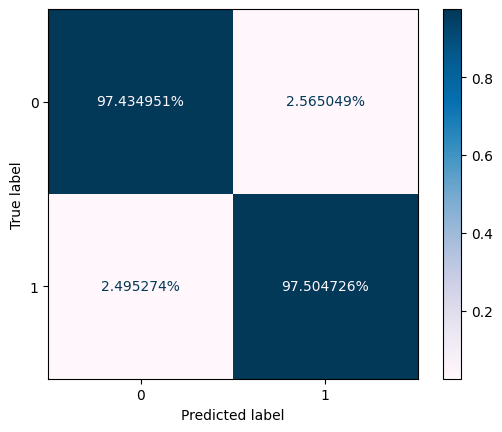

In [ ]:
# Perform the prediction
rfc = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"], 
                             min_samples_split=grid.best_params_["min_samples_split"],
                             min_samples_leaf=grid.best_params_["min_samples_leaf"],
                             max_depth=grid.best_params_["max_depth"])
rfc.fit(X_train, y_train)

# Predict the values
predictions = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Plot the confusion matrix with percentage values
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        normalize="true", values_format=".6%", cmap="PuBu")
